In [1]:
# Prob 1Load Libraries
import pandas as pd
from rpy2.robjects import r, pandas2ri
from rpy2.robjects.conversion import localconverter
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
# Activate pandas-to-R conversion
pandas2ri.activate() 

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [2]:
# 1A Import and view Data

# Load the airquality dataset from R
r_data = r('datasets::airquality')

# Convert to pandas DataFrame
with localconverter(pandas2ri.converter):
    airquality_df = pandas2ri.rpy2py(r_data)

# Display the DataFrame
print(airquality_df)
print(airquality_df.describe()) 

wind = airquality_df['Wind']

# Count NA values
na_count = wind.isna().sum().sum()

# Count infinite values
inf_count = np.isinf(wind).sum().sum()
print(f"NA count: {na_count}, 'Infinity count': {inf_count}")

          Ozone     Solar.R  Wind  Temp  Month  Day
1            41         190   7.4    67      5    1
2            36         118   8.0    72      5    2
3            12         149  12.6    74      5    3
4            18         313  11.5    62      5    4
5   -2147483648 -2147483648  14.3    56      5    5
..          ...         ...   ...   ...    ...  ...
149          30         193   6.9    70      9   26
150 -2147483648         145  13.2    77      9   27
151          14         191  14.3    75      9   28
152          18         131   8.0    76      9   29
153          20         223  11.5    68      9   30

[153 rows x 6 columns]
              Ozone       Solar.R        Wind        Temp       Month  \
count  1.530000e+02  1.530000e+02  153.000000  153.000000  153.000000   
mean  -5.193261e+08 -9.825071e+07    9.957516   77.882353    6.993464   
std    9.225549e+08  4.501817e+08    3.523001    9.465270    1.416522   
min   -2.147484e+09 -2.147484e+09    1.700000   56.000000   

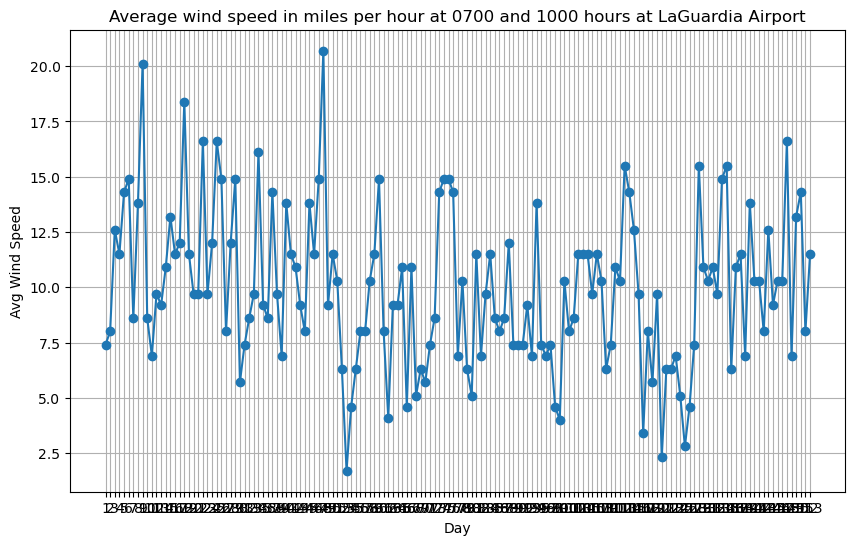

<Figure size 1000x600 with 0 Axes>

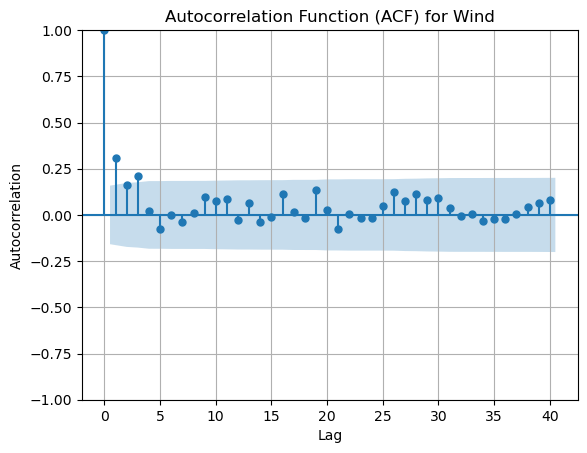

                            AutoReg Model Results                             
Dep. Variable:                   Wind   No. Observations:                  153
Model:                     AutoReg(1)   Log Likelihood                -399.095
Method:               Conditional MLE   S.D. of innovations              3.342
Date:                Sun, 01 Dec 2024   AIC                            804.190
Time:                        14:42:53   BIC                            813.262
Sample:                             1   HQIC                           807.875
                                  153                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8837      0.813      8.472      0.000       5.291       8.476
Wind.L1        0.3107      0.077      4.035      0.000       0.160       0.462
                                    Roots           

/Users/diegosinay/.pyenv/versions/anaconda3-2024.06-1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Users/diegosinay/.pyenv/versions/anaconda3-2024.06-1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Figure size 1000x600 with 0 Axes>

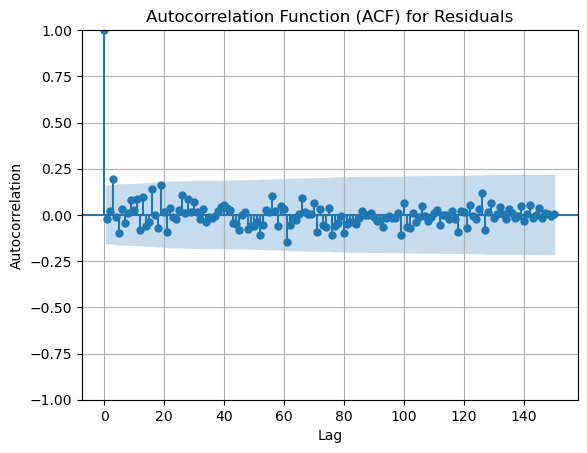

In [3]:
# Prob 1A
# Wind: Average wind speed in miles per hour at 0700 and 1000 hours at LaGuardia Airport
plt.figure(figsize=(10, 6))
plt.plot(wind, marker='o', linestyle='-')
plt.xlabel('Day')
plt.ylabel('Avg Wind Speed')
plt.title('Average wind speed in miles per hour at 0700 and 1000 hours at LaGuardia Airport')
plt.grid(True)
plt.show()
# The most prevailing characterisitic seams to be either a autocorrelation or seasonality

# Create the ACF plot
plt.figure(figsize=(10, 6))
plot_acf(wind, lags=40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) for Wind')
plt.grid(True)
plt.show()
# It appears that the most prevealing characteristic of the time serries is that is is mean reverting

auto_reg_model = AutoReg(wind, lags=1).fit()
print(auto_reg_model.summary())

# Produce the ACF plot of the residuals
residuals = auto_reg_model.resid
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=150)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) for Residuals')
plt.grid(True)
plt.show()

In [4]:
# 1B Import and view Data

# Load the airquality dataset from R
r_data2 = r('datasets::austres')

# Display the DataFrame
print(r_data2)

# Create a pandas DataFrame 
index = np.arange(len(r_data2))
australian_res_df = pd.DataFrame({
    't': index,
    'Australian Residents': r_data2
})
australian_res_df.set_index('t', inplace=True)
print(australian_res_df.describe())

# Count NA values
na_count = australian_res_df.isna().sum().sum()

# Count infinite values
inf_count = np.isinf(australian_res_df).sum().sum()
print(f"NA count: {na_count}, 'Infinity count': {inf_count}")


[13067.3 13130.5 13198.4 13254.2 13303.7 13353.9 13409.3 13459.2 13504.5
 13552.6 13614.3 13669.5 13722.6 13772.1 13832.  13862.6 13893.  13926.8
 13968.9 14004.7 14033.1 14066.  14110.1 14155.6 14192.2 14231.7 14281.5
 14330.3 14359.3 14396.6 14430.8 14478.4 14515.7 14554.9 14602.5 14646.4
 14695.4 14746.6 14807.4 14874.4 14923.3 14988.7 15054.1 15121.7 15184.2
 15239.3 15288.9 15346.2 15393.5 15439.  15483.5 15531.5 15579.4 15628.5
 15677.3 15736.7 15788.3 15839.7 15900.6 15961.5 16018.3 16076.9 16139.
 16203.  16263.3 16327.9 16398.9 16478.3 16538.2 16621.6 16697.  16777.2
 16833.1 16891.6 16956.8 17026.3 17085.4 17106.9 17169.4 17239.4 17292.
 17354.2 17414.2 17447.3 17482.6 17526.  17568.7 17627.1 17661.5]
       Australian Residents
count             89.000000
mean           15273.449438
std             1356.812524
min            13067.300000
25%            14110.100000
50%            15184.200000
75%            16398.900000
max            17661.500000
NA count: 0, 'Infinity coun

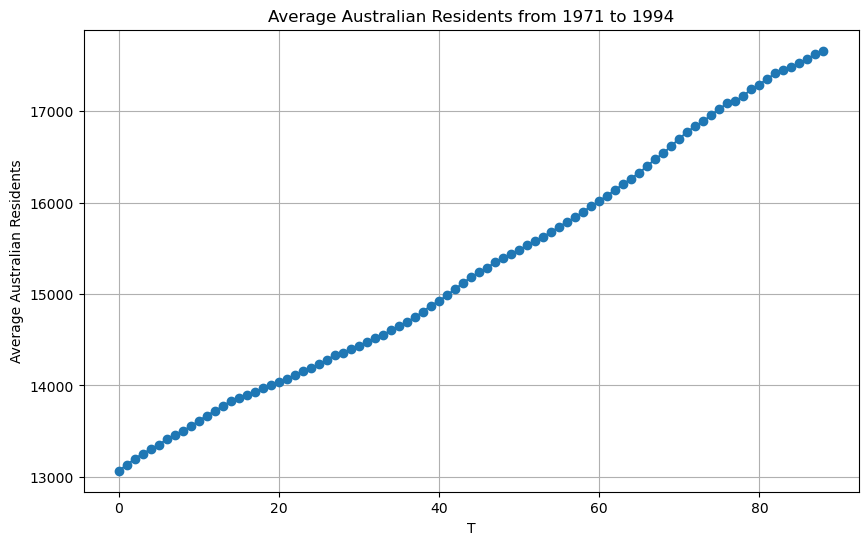

<Figure size 1000x600 with 0 Axes>

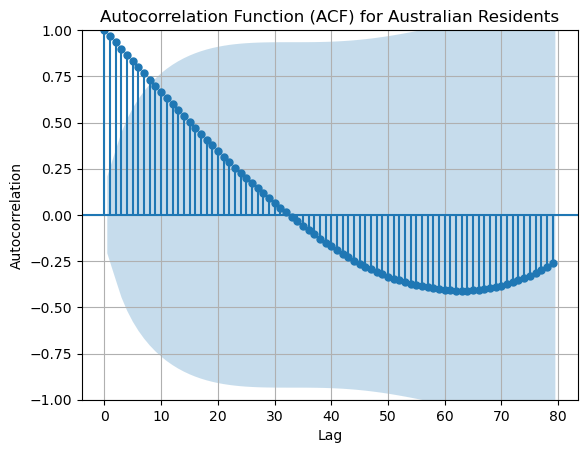

                             AutoReg Model Results                              
Dep. Variable:     Australian Residents   No. Observations:                   89
Model:                       AutoReg(1)   Log Likelihood                -344.377
Method:                 Conditional MLE   S.D. of innovations             12.115
Date:                  Sun, 01 Dec 2024   AIC                            694.755
Time:                          14:42:54   BIC                            702.187
Sample:                               1   HQIC                           697.749
                                     89                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      11.6519     14.834      0.786      0.432     -17.422      40.725
Australian Residents.L1     1.0027      0.001   1034.479      0.000       1.

<Figure size 1000x600 with 0 Axes>

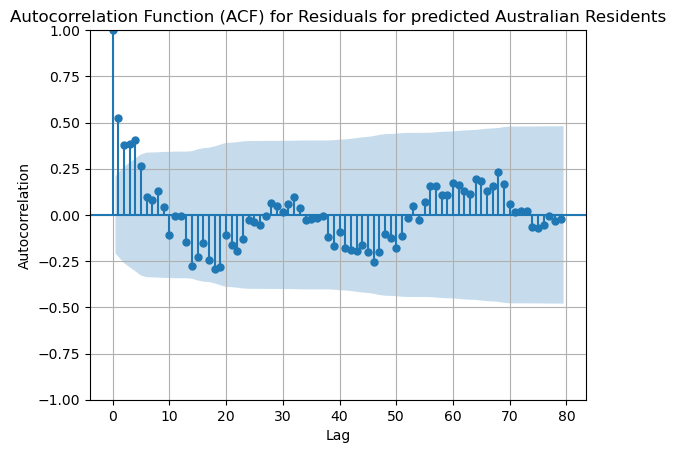

In [5]:
# Prob 1B
# Wind: Average wind speed in miles per hour at 0700 and 1000 hours at LaGuardia Airport
plt.figure(figsize=(10, 6))
plt.plot(australian_res_df['Australian Residents'], marker='o', linestyle='-')
plt.xlabel('T')
plt.ylabel('Average Australian Residents')
plt.title('Average Australian Residents from 1971 to 1994')
plt.grid(True)
plt.show()
# The most prevailing characterisitic seams to a strong trend (with some autocorrelation)

# Create the ACF plot
plt.figure(figsize=(10, 6))
plot_acf(australian_res_df['Australian Residents'], lags=79)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) for Australian Residents')
plt.grid(True)
plt.show()
# The autocorrelation plot shows a slow decay in the autocorrelation, indicating that the data could be a random walk

auto_reg_model_australian_res = AutoReg(australian_res_df['Australian Residents'], lags=1).fit()
print(auto_reg_model_australian_res.summary())

# Produce the ACF plot of the residuals
residuals_australian_res = auto_reg_model_australian_res.resid
plt.figure(figsize=(10, 6))
plot_acf(residuals_australian_res, lags=79)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) for Residuals for predicted Australian Residents')
plt.grid(True)
# There seems to be a sesonality dependence still on the residuals of the model



                             OLS Regression Results                             
Dep. Variable:     Australian Residents   R-squared:                       1.000
Model:                              OLS   Adj. R-squared:                  1.000
Method:                   Least Squares   F-statistic:                 5.212e+05
Date:                  Sun, 01 Dec 2024   Prob (F-statistic):          1.70e-174
Time:                          14:42:54   Log-Likelihood:                -344.00
No. Observations:                    88   AIC:                             694.0
Df Residuals:                        85   BIC:                             701.4
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        147.4869    160.442

<Figure size 1000x600 with 0 Axes>

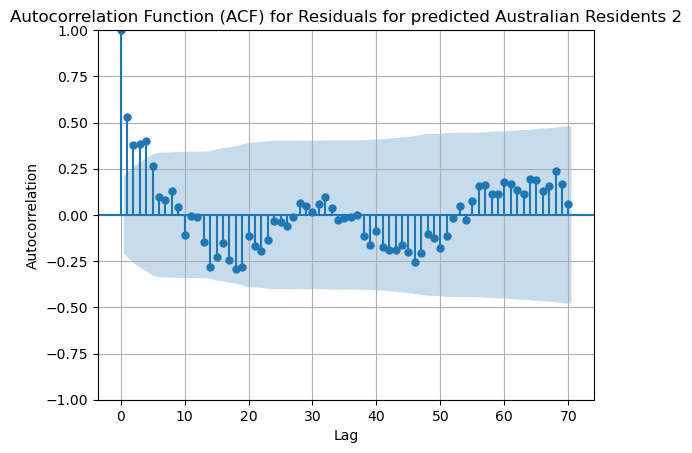

In [6]:
# 1B another way with noise
# Add lagged values as a new column
australian_res_df2 = australian_res_df.copy()
australian_res_df2['Lagged'] = australian_res_df2['Australian Residents'].shift(1)

# Drop the first row with NaN value due to lagging
australian_res_df2.dropna(inplace=True)

# Define the predictors (including the lagged values and the 't' variable)
X = australian_res_df2[['Lagged']]
X['t'] = australian_res_df2.index
X = sm.add_constant(X)  # Add a constant term for the intercept

# Define the response variable
y = australian_res_df2['Australian Residents']

# Fit the OLS regression model
auto_reg_model_australian_res2 = sm.OLS(y, X).fit()

# Print the summary of the model
print(auto_reg_model_australian_res2.summary())

# Produce the ACF plot of the residuals
residuals_australian_res2 = auto_reg_model_australian_res2.resid
plt.figure(figsize=(10, 6))
plot_acf(residuals_australian_res2, lags=70)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) for Residuals for predicted Australian Residents 2')
plt.grid(True)

In [7]:
# 1C Import and view Data

# Load the airquality dataset from R
r_data3 = r('datasets::BJsales')

# Display the DataFrame
print(r_data3)

# Create a pandas DataFrame 
index3 = np.arange(len(r_data3))
bjsales_df = pd.DataFrame({
    't': index3,
    'BJ_Sales': r_data3
})
bjsales_df.set_index('t', inplace=True)
print(bjsales_df.describe())

# Count NA values
na_count = bjsales_df.isna().sum().sum()

# Count infinite values
inf_count = np.isinf(bjsales_df).sum().sum()
print(f"NA count: {na_count}, 'Infinity count': {inf_count}")

[200.1 199.5 199.4 198.9 199.  200.2 198.6 200.  200.3 201.2 201.6 201.5
 201.5 203.5 204.9 207.1 210.5 210.5 209.8 208.8 209.5 213.2 213.7 215.1
 218.7 219.8 220.5 223.8 222.8 223.8 221.7 222.3 220.8 219.4 220.1 220.6
 218.9 217.8 217.7 215.  215.3 215.9 216.7 216.7 217.7 218.7 222.9 224.9
 222.2 220.7 220.  218.7 217.  215.9 215.8 214.1 212.3 213.9 214.6 213.6
 212.1 211.4 213.1 212.9 213.3 211.5 212.3 213.  211.  210.7 210.1 211.4
 210.  209.7 208.8 208.8 208.8 210.6 211.9 212.8 212.5 214.8 215.3 217.5
 218.8 220.7 222.2 226.7 228.4 233.2 235.7 237.1 240.6 243.8 245.3 246.
 246.3 247.7 247.6 247.8 249.4 249.  249.9 250.5 251.5 249.  247.6 248.8
 250.4 250.7 253.  253.7 255.  256.2 256.  257.4 260.4 260.  261.3 260.4
 261.6 260.8 259.8 259.  258.9 257.4 257.7 257.9 257.4 257.3 257.6 258.9
 257.8 257.7 257.2 257.5 256.8 257.5 257.  257.6 257.3 257.5 259.6 261.1
 262.9 263.3 262.8 261.8 262.2 262.7]
         BJ_Sales
count  150.000000
mean   229.978000
std     21.479686
min    198.6000

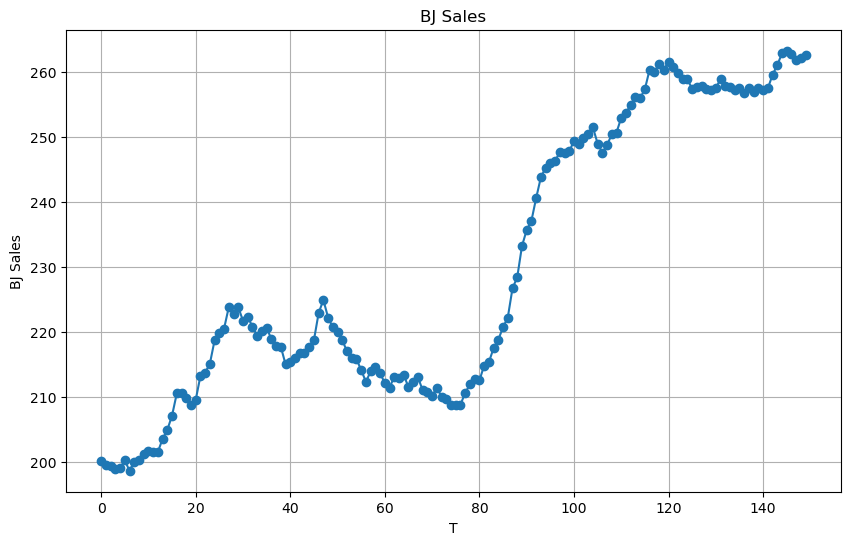

<Figure size 1000x600 with 0 Axes>

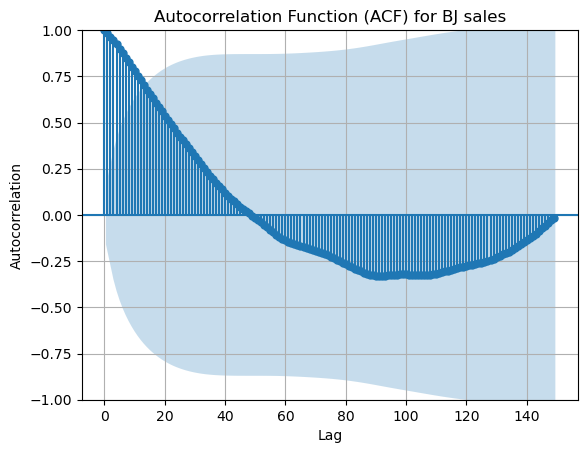

                            OLS Regression Results                            
Dep. Variable:               BJ_Sales   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 3.218e+04
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          4.63e-174
Time:                        14:42:55   Log-Likelihood:                -265.65
No. Observations:                 149   AIC:                             535.3
Df Residuals:                     147   BIC:                             541.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6398      1.285      0.498      0.6

<Figure size 1000x600 with 0 Axes>

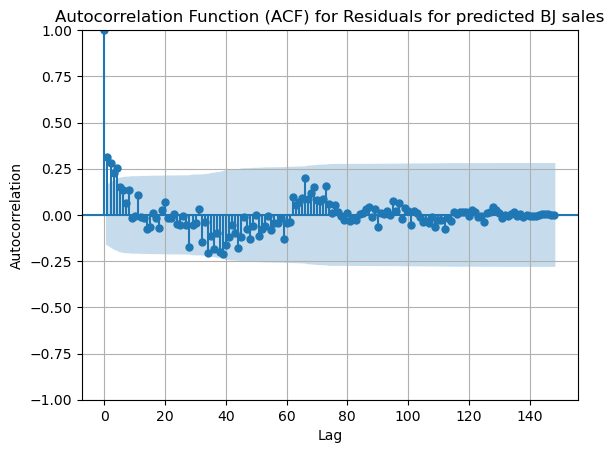

In [8]:
# 1C
plt.figure(figsize=(10, 6))
plt.plot(bjsales_df, marker='o', linestyle='-')
plt.xlabel('T')
plt.ylabel('BJ Sales')
plt.title('BJ Sales')
plt.grid(True)
plt.show()
# The most prevailing characterisitic seams to autocorrelation

# Create the ACF plot
plt.figure(figsize=(10, 6))
plot_acf(bjsales_df, lags=149)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) for BJ sales')
plt.grid(True)
plt.show()
# The autocorrelation plot shows a slow decay in the autocorrelation, indicating that the data could be a random walk

bjsales_df2 = bjsales_df.copy()
bjsales_df2['Lagged'] = bjsales_df2['BJ_Sales'].shift(1)

# Drop the first row with NaN value due to lagging
bjsales_df2.dropna(inplace=True)

X_bj = bjsales_df2[['Lagged']]
X_bj = sm.add_constant(X_bj)  # Add a constant term for the intercept

# Define the response variable
y_bj = bjsales_df2['BJ_Sales']

# Fit the OLS regression model
auto_reg_model_bj = sm.OLS(y_bj, X_bj).fit()

# Print the summary of the model
print(auto_reg_model_bj.summary())

# Produce the ACF plot of the residuals
auto_reg_model_bj_res = auto_reg_model_bj.resid
plt.figure(figsize=(10, 6))
plot_acf(auto_reg_model_bj_res, lags=148)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) for Residuals for predicted BJ sales')
plt.grid(True)

#Residuals still seam to have a temporal dependence (seasonality)

In [9]:
# Prob 2 Import and Data
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt


food = pd.read_csv("Food_Inspections_proc.csv")

# Create new columns and drop the specified columns
food = food.assign(
    FAIL=food['Results'] == "Fail",
    SERIOUS_FAIL=food['IsSerious'],
    PASS=food['Results'].isin(["Pass", "Pass w/ Conditions"]),
    NO_ENTRY=food['Results'] == "No Entry",
    NOT_READY=food['Results'] == "Not Ready"
).drop(columns=['Results', 'IsSerious'])

# Display the DataFrame
print(food.head())

  Inspection.Date  Year  Month        DBA.Name                  Address  \
0      10/21/2021  2021     10  LUKE'S LOBSTER          134 N LA SALLE    
1      10/20/2021  2021     10       AFRO JERK       1156 N PULASKI RD    
2      09/28/2021  2021      9       CHEMISTRY  5115-5121 S HARPER AVE    
3      09/21/2021  2021      9       STAX CAFE        1401 W TAYLOR ST    
4      09/07/2021  2021      9       OMBUDSMAN      2401 W CONGRESS ST    

       Zip  ReportSize   FAIL  SERIOUS_FAIL   PASS  NO_ENTRY  NOT_READY  
0  60602.0           0  False         False   True     False      False  
1  60651.0           0  False         False  False      True      False  
2  60615.0           0  False         False  False     False       True  
3  60607.0           0  False         False   True     False      False  
4  60612.0           0  False         False   True     False      False  


In [10]:
# 2A

# Group by 'DBA.Name' and calculate the number of inspections
inspection_counts = food.groupby('DBA.Name').size().reset_index(name='NUM')

# Filter for entries with at least 40 inspections
filtered_restaurants = food[food['DBA.Name'].isin(inspection_counts[inspection_counts['NUM'] >= 40]['DBA.Name'])]

# Group by 'DBA.Name' and calculate NUM and PASS_RATE
quality = filtered_restaurants.groupby('DBA.Name').agg(
    NUM=('DBA.Name', 'size'),
    PASS_RATE=('PASS', 'mean')
).reset_index()

# Sort the DataFrame by PASS_RATE in descending order
quality = quality.sort_values(by='PASS_RATE', ascending=False)

# Display the DataFrame
pd.set_option('display.max_rows', None)
print(quality)
pd.set_option('display.max_rows', 15)

# I Buy a looot of cooked food at Marianos. It's .81 pass rate, is decent but not great. I would expect it to be higher. I will be on the look out at what I buy and the quality of the food next time


                                              DBA.Name   NUM  PASS_RATE
243                                  THE UNITED CENTER    53   0.981132
262                              WRIGLEYVILLE ROOFTOPS    40   0.975000
132                  LEVY RESTAURANTS AT WRIGLEY FIELD    85   0.964706
78                               GIORDANO'S RESTAURANT    48   0.958333
255                               WALDO COONEY'S PIZZA    52   0.942308
184                                     PETE'S PRODUCE    85   0.941176
244                                            THE WIT    45   0.933333
92                              HOST INTERNATIONAL INC    89   0.932584
98                    ILLINOIS INSTITUTE OF TECHNOLOGY    43   0.930233
249                          TRUMP INTERNATIONAL HOTEL    54   0.925926
206                                     SAIGON SISTERS    40   0.925000
202                          RENAISSANCE CHICAGO HOTEL    49   0.918367
238                           THE GREAT AMERICAN BAGEL   119   0

     Year  Month  TESTS  PASS_RATE     DATE
0    2010      1   1279   0.741784   2010-1
1    2010      2   1399   0.755540   2010-2
2    2010      3   1480   0.763194   2010-3
3    2010      4   1438   0.721642   2010-4
4    2010      5   1542   0.747567   2010-5
..    ...    ...    ...        ...      ...
138  2021      7   1267   0.747070   2021-7
139  2021      8   1369   0.752205   2021-8
140  2021      9   1206   0.754607   2021-9
141  2021     10   1149   0.739829  2021-10
142  2021     11    321   0.772727  2021-11

[143 rows x 5 columns]
              Year       Month        TESTS   PASS_RATE
count   143.000000  143.000000   143.000000  143.000000
mean   2015.461538    6.461538  1595.636364    0.776811
std       3.445285    3.445285   302.627125    0.025326
min    2010.000000    1.000000   321.000000    0.712382
25%    2012.500000    3.500000  1386.500000    0.760372
50%    2015.000000    6.000000  1596.000000    0.777015
75%    2018.000000    9.000000  1776.000000    0.794123


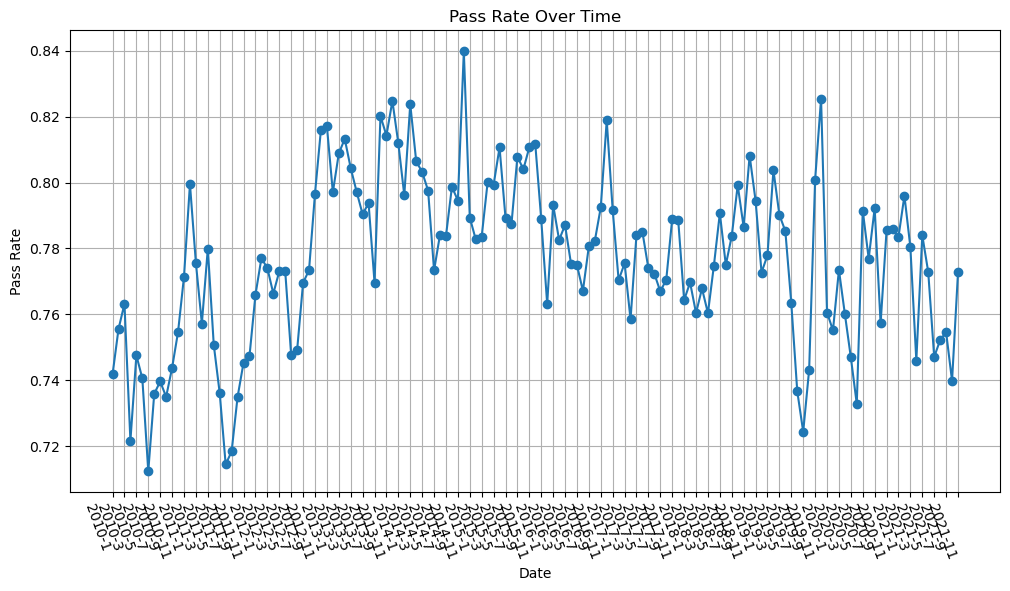

In [11]:
# 2B

# Group by 'Year' and 'Month' and calculate TESTS and PASS_RATE
agg = (
    food.groupby(['Year', 'Month'])
    .agg(
        TESTS=('PASS', 'count'),  # Count the number of rows in the 'PASS' column
        TOTAL_PASS=('PASS', 'sum'),  # Sum of 'PASS'
        TOTAL_FAIL=('FAIL', 'sum')  # Sum of 'FAIL'
    )
    .reset_index()  # Reset index to make 'Year' and 'Month' regular columns
)

# Calculate PASS_RATE after grouping and aggregation
agg['PASS_RATE'] = agg['TOTAL_PASS'] / (agg['TOTAL_PASS'] + agg['TOTAL_FAIL'])

# Add the DATE column
agg['DATE'] = agg['Year'].astype(str) + "-" + agg['Month'].astype(str)

# Drop unnecessary intermediate columns (if needed)
agg = agg.drop(columns=['TOTAL_PASS', 'TOTAL_FAIL'])

# Display the DataFrame
print(agg)
print(agg.describe())   

# Plot
pass_rate = agg['PASS_RATE']
plt.figure(figsize=(12, 6))
plt.plot(pass_rate, linestyle='-', marker='o')
# Set x-axis labels
plt.xticks(ticks=range(0, len(agg['DATE']), 2), labels=agg['DATE'][::2], rotation=290, ha='right')
# Set axis labels and title
plt.xlabel('Date')
plt.ylabel('Pass Rate')
plt.title('Pass Rate Over Time')
plt.grid(True)

# 143 Observations
# From 2010 to 2021 so 12 years
# Frequency is monthly (K=12)

<Figure size 1200x600 with 0 Axes>

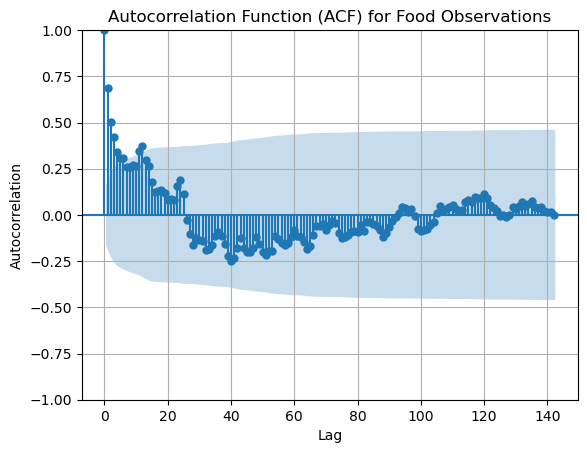

In [12]:
# 2C
# Create the ACF plot

plt.figure(figsize=(12, 6))
plot_acf(pass_rate, lags=142)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) for Food Observations')
plt.grid(True)
plt.show()
# We do observe a strong autocorrelation in the data. It aooears to be stationary!

In [13]:
# 2D
pass_rate2 = pass_rate.to_frame(name='PASS_RATE')
pass_rate2['Lagged'] = pass_rate2.shift(1)

# Drop the first row with NaN value due to lagging
pass_rate2.dropna(inplace=True)

X_agg = pass_rate2[['Lagged']]
X_agg = sm.add_constant(X_agg)  # Add a constant term for the intercept

# Define the response variable
y_agg = pass_rate2['PASS_RATE']

# Fit the OLS regression model
auto_reg_model_agg = sm.OLS(y_agg, X_agg).fit()

# Print the summary of the model
print(auto_reg_model_agg.summary())
b0 = auto_reg_model_agg.params[0]
b1 = auto_reg_model_agg.params[1]

print(f"The estimated mean level for the statioanry time series is {b0/(1-b1)}")

                            OLS Regression Results                            
Dep. Variable:              PASS_RATE   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     128.8
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           1.44e-21
Time:                        14:42:57   Log-Likelihood:                 367.76
No. Observations:                 142   AIC:                            -731.5
Df Residuals:                     140   BIC:                            -725.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2430      0.047      5.159      0.0

/var/folders/zw/1prw4rfn3kq_m_xh3tx6jp1h0000gn/T/ipykernel_31511/1091927555.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b0 = auto_reg_model_agg.params[0]
/var/folders/zw/1prw4rfn3kq_m_xh3tx6jp1h0000gn/T/ipykernel_31511/1091927555.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b1 = auto_reg_model_agg.params[1]


<Figure size 1200x600 with 0 Axes>

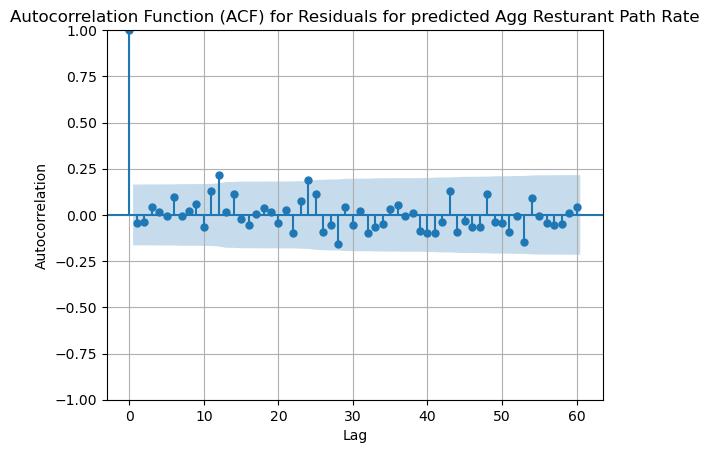

In [14]:
# 2E
# Produce the ACF plot of the residuals

auto_reg_model_agg_res = auto_reg_model_agg.resid
plt.figure(figsize=(12, 6))
plot_acf(auto_reg_model_agg_res, lags=60)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) for Residuals for predicted Agg Resturant Path Rate')
plt.grid(True)

#It appears that lag 12 has a strong autocorrelation

In [15]:
# 2F-1 Add seasonal predictors (sine and cosine for periodicity)
n = len(pass_rate2)
time = np.arange(n)  # Time index
seasonality_order = 12  # yearly seasonality

pass_rate2['sin'] = np.sin(2 * np.pi * time / seasonality_order)
pass_rate2['cos'] = np.cos(2 * np.pi * time / seasonality_order)

# Redefine the predictors (X) with seasonality terms
X_seasonal = pass_rate2[['Lagged', 'sin', 'cos']]
X_seasonal = sm.add_constant(X_seasonal)

# Define the response variable
y_agg = pass_rate2['PASS_RATE']

# Fit the seasonal model
seasonal_model = sm.OLS(y_agg, X_seasonal).fit()
print(seasonal_model.summary())

print("--------------------")
print("AR(1) Model AIC:", auto_reg_model_agg.aic)
print("Seasonal Model AIC:", seasonal_model.aic)
# Determine which model has the lower AIC
if seasonal_model.aic < auto_reg_model_agg.aic:
    print("The seasonal model is better (lower AIC).")
else:
    print("The AR(1) model is better (lower AIC).")
print("--------------------")
anova_results = sm.stats.anova_lm(auto_reg_model_agg, seasonal_model)
print(anova_results)


                            OLS Regression Results                            
Dep. Variable:              PASS_RATE   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     47.61
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           3.47e-21
Time:                        14:42:57   Log-Likelihood:                 371.90
No. Observations:                 142   AIC:                            -735.8
Df Residuals:                     138   BIC:                            -724.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2599      0.048      5.386      0.0

In [16]:
# 2F-2 Adding dummy variables for the months with vacations
# Assume "agg" contains the 'Month' information
pass_rate2['Month'] = agg['Month']  # Add the 'Month' column from agg to pass_rate2


# Create dummy variables for the categorical 'Month' variable
month_dummies = pd.get_dummies(pass_rate2['Month'], prefix='Month', drop_first=True)  # Drop the first category to avoid multicollinearity

# Ensure boolean month columns are converted to numeric (if necessary)
month_dummies = month_dummies.astype(int)  # Convert True/False to 1/0

# Combine the Lagged variable, sine/cosine, and month dummies into predictors
X_seasonal2 = pd.concat([pass_rate2[['Lagged']], month_dummies], axis=1)
X_seasonal2 = sm.add_constant(X_seasonal2)  # Add constant for intercept

# Define the response variable
y_agg = pass_rate2['PASS_RATE']

X_seasonal2 = X_seasonal2.loc[y_agg.index]

# Fit the seasonal model with the month categorical variables
seasonal_model_with_months = sm.OLS(y_agg, X_seasonal2).fit()
print(seasonal_model_with_months.summary())

                            OLS Regression Results                            
Dep. Variable:              PASS_RATE   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     15.25
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           1.55e-19
Time:                        14:42:57   Log-Likelihood:                 384.17
No. Observations:                 142   AIC:                            -742.3
Df Residuals:                     129   BIC:                            -703.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2229      0.050      4.496      0.0

In [17]:
# 2F-3 Just with mont h12
# Assume "agg" contains the 'Month' information
pass_rate2['Month_12'] = (pass_rate2['Month'] == 12).astype(int)  # True for December, else False (converted to 1/0)

# Combine predictors
X_seasonal3 = pass_rate2[['Lagged', 'Month_12']]
X_seasonal3 = sm.add_constant(X_seasonal3)  # Add constant for intercept

# Define the response variable
y_agg = pass_rate2['PASS_RATE']

# Fit the seasonal model with only Month 12 as a categorical predictor
seasonal_model_with_month12 = sm.OLS(y_agg, X_seasonal3).fit()

# Print the summary of the model
print(seasonal_model_with_month12.summary())
print("--------------------")
print("AR(1) Model AIC:", auto_reg_model_agg.aic)
print("Seasonal Model AIC:", seasonal_model_with_month12.aic)
# Determine which model has the lower AIC
if seasonal_model_with_month12.aic < auto_reg_model_agg.aic:
    print("The seasonal model-month12 is better (lower AIC).")
else:
    print("The AR(1) model is better (lower AIC).")
print("--------------------")
anova_results = sm.stats.anova_lm(auto_reg_model_agg, seasonal_model_with_month12)
print(anova_results)

                            OLS Regression Results                            
Dep. Variable:              PASS_RATE   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     75.75
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           5.63e-23
Time:                        14:42:57   Log-Likelihood:                 373.80
No. Observations:                 142   AIC:                            -741.6
Df Residuals:                     139   BIC:                            -732.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2604      0.046      5.715      0.0